<a href="https://colab.research.google.com/github/FortunatusAdunola/Customer-Behavior-Revenue-and-Churn-Analysis/blob/main/Ecommerce_Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, IsolationForest
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import (
    precision_recall_curve, classification_report, roc_auc_score,
    confusion_matrix, fbeta_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import shap
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


#Data Preprocessing and Cleaning

In [2]:
#Load Dataset
df = pd.read_csv('ecommerce_customer_churn_dataset.csv')
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [4]:
#Checking for missing data
df.isnull().sum()

,0
Age,2495
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000


In [5]:
# Calculate Percentage of the missing data in each column
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Age                               4.990
Gender                            0.000
Country                           0.000
City                              0.000
Membership_Years                  0.000
Login_Frequency                   0.000
Session_Duration_Avg              6.798
Pages_Per_Session                 6.000
Cart_Abandonment_Rate             0.000
Wishlist_Items                    8.000
Total_Purchases                   0.000
Average_Order_Value               0.000
Days_Since_Last_Purchase          6.000
Discount_Usage_Rate               7.000
Returns_Rate                      8.982
Email_Open_Rate                   5.056
Customer_Service_Calls            0.336
Product_Reviews_Written           7.000
Social_Media_Engagement_Score    12.000
Mobile_App_Usage                 10.000
Payment_Method_Diversity          5.000
Lifetime_Value                    0.000
Credit_Balance                   11.000
Churned                           0.000
Signup_Quarter                    0.000


In [6]:
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

I checked for missing values in the dataset and there are columns with incomplete values. Next, I checked the percentage of the missing dataset and noticed the percentage is within 1 - 12%. So, instead of dropping I decide to use median to replace the missing values. I used median imputation instead of mean because most customer and behavioural variables in this dataset are likely to be skewed and influenced by outliers, such as very high spenders, heavy users, or inactive customers. The mean is highly sensitive to extreme values and can artificially inflate the typical value of a feature, which may distort the true customer behaviour patterns. In contrast, the median represents the middle value of the distribution and is more robust to outliers, making it a more reliable measure of central tendency for e-commerce and engagement-related metrics like session duration, return rate, credit balance, and usage frequencies. Since the dataset contains behavioural and transactional features rather than normally distributed measurements, median imputation preserves realistic data patterns, reduces bias, and improves the quality of downstream analysis, visualisations, and machine learning models such as churn prediction.

In [7]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,27.6,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,27.6,8.8,2.0,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [8]:
#rechecking for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,0
Pages_Per_Session,0
Cart_Abandonment_Rate,0
Wishlist_Items,0


In [9]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

#Exploratory Data Analysis

In [10]:
# Statistical summary
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,...,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,2.33618,1440.626292,1958.507600,0.289000
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,...,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,1.08465,907.249443,1155.938248,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,...,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,1164.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.00000,1243.415000,1896.000000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,...,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,2664.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,7197.000000,1.000000


In [11]:
# Create a copy
df_clean = df.copy()

# 1. Fix Age (realistic customer range)
df_clean['Age'] = df_clean['Age'].clip(lower=16, upper=100)

# 2. Fix negative purchases (impossible values)
df_clean['Total_Purchases'] = df_clean['Total_Purchases'].clip(lower=0)

# 3. Fix rate/percentage columns (must be 0–100)
rate_columns = [
    'Cart_Abandonment_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Discount_Usage_Rate'
]
for col in rate_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(0, 100)

# 4. Fix behavioural/count columns (cannot be negative)
count_cols = [
    'Login_Frequency',
    'Pages_Per_Session',
    'Wishlist_Items',
    'Customer_Service_Calls',
    'Product_Reviews_Written',
    'Mobile_App_Usage',
    'Payment_Method_Diversity'
]
for col in count_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(lower=0)

# 5. Ensure monetary values are non-negative
monetary_cols = ['Average_Order_Value', 'Lifetime_Value', 'Credit_Balance']
for col in monetary_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(lower=0)

# 6. Ensure time-based values are valid
df_clean['Days_Since_Last_Purchase'] = df_clean['Days_Since_Last_Purchase'].clip(lower=0)

# Final check
df_clean.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,37.787000,2.984009,11.624660,27.602240,8.717542,57.068176,4.274520,13.116560,123.117330,29.265300,...,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,2.33618,1440.626292,1958.507600,0.289000
std,11.237884,2.059105,7.810657,10.497234,3.663996,16.240999,3.060573,7.005246,175.569714,28.866043,...,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,1.08465,907.249443,1155.938248,0.453302
min,16.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,...,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,1164.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.00000,1243.415000,1896.000000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,...,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,2664.000000,1.000000
max,100.000000,10.000000,46.000000,75.600000,24.100000,100.000000,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,7197.000000,1.000000


After checking the statistical summary of the dataset, there are few impossible values that are noted. The dataset was cleaned using domain-based validation to correct logically impossible and unrealistic values while preserving all 50,000 records. Instead of deleting rows, value clipping was applied to enforce real-world business rules. Age was restricted to a realistic customer range (16–100 years), and negative values in Total_Purchases were set to zero since purchases cannot be negative. Rate-based columns such as Cart_Abandonment_Rate, Returns_Rate, Email_Open_Rate, and Discount_Usage_Rate were constrained to fall within 0–100%, ensuring percentage consistency. Behavioural and count-based variables (e.g., Login_Frequency, Wishlist_Items, Customer_Service_Calls) were restricted to non-negative values, as negative counts are not logically valid. Monetary variables including Average_Order_Value, Lifetime_Value, and Credit_Balance were also enforced to be non-negative. This approach maintains dataset integrity, improves analytical reliability, and ensures the data aligns with realistic e-commerce business logic for accurate visualisation and modelling.

#Feature Engineering

In [12]:
#Create Estimated Revenue Column
df['Revenue'] = df['Total_Purchases'] * df['Average_Order_Value']

In [13]:
# Create High vs Low Engagement Segment
df['Engagement_Level'] = np.where(
    (df['Login_Frequency'] > df['Login_Frequency'].median()) &
    (df['Session_Duration_Avg'] > df['Session_Duration_Avg'].median()),
    'High Engagement',
    'Low Engagement'
)

In [14]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Revenue,Engagement_Level
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1,852.480,High Engagement
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,3.0,27.6,23.3,3.0,1067.47,3028.0,0,Q4,1607.775,High Engagement
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,1.0,27.6,8.8,2.0,1289.75,2317.0,0,Q4,1506.232,Low Engagement
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1,2209.950,Low Engagement
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,...,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4,4592.250,High Engagement


#Univariate Analysis

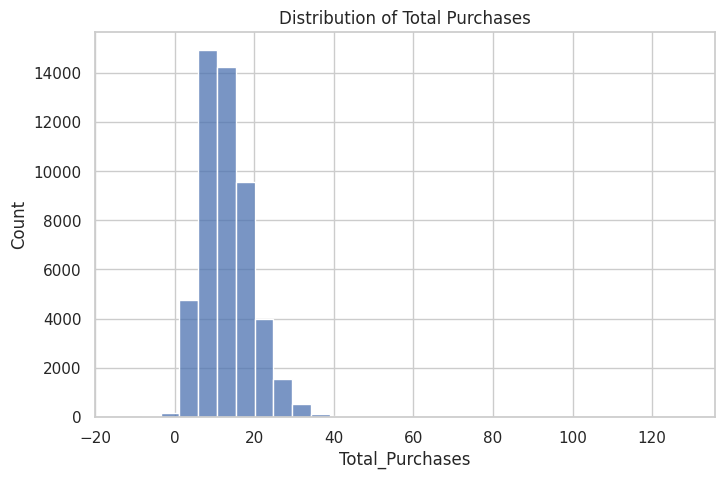

In [15]:
#Distribution of Purchase
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Purchases'], bins=30)
plt.title("Distribution of Total Purchases")
plt.show()

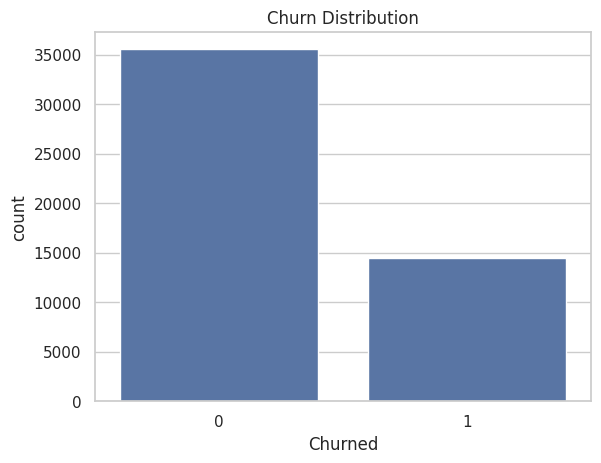

In [16]:
#Churn Distribution
sns.countplot(x='Churned', data=df)
plt.title("Churn Distribution")
plt.show()

#Behavioural EDA

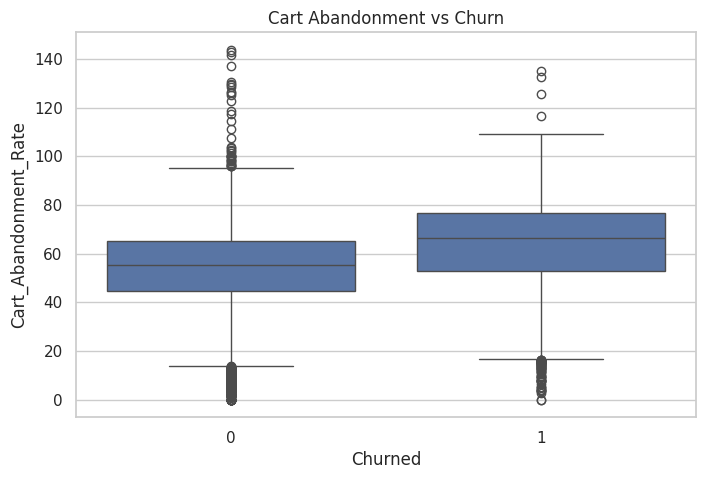

In [17]:
#Cart Abandonment Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='Churned', y='Cart_Abandonment_Rate', data=df)
plt.title("Cart Abandonment vs Churn")
plt.show()

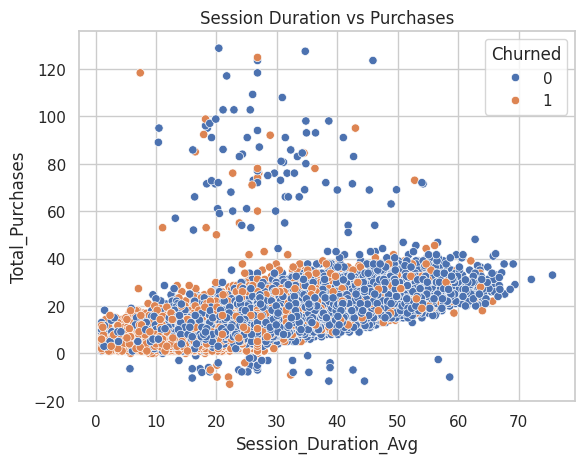

In [18]:
#Engagement vs Purchases
sns.scatterplot(
    x='Session_Duration_Avg',
    y='Total_Purchases',
    hue='Churned',
    data=df
)
plt.title("Session Duration vs Purchases")
plt.show()

#Revenue Analysis

In [19]:
# Top revenue statistics
df['Revenue'].describe()

# Revenue by churn status
df.groupby('Churned')['Revenue'].mean()

,Revenue
Churned,
0,1639.012427
1,1567.463065


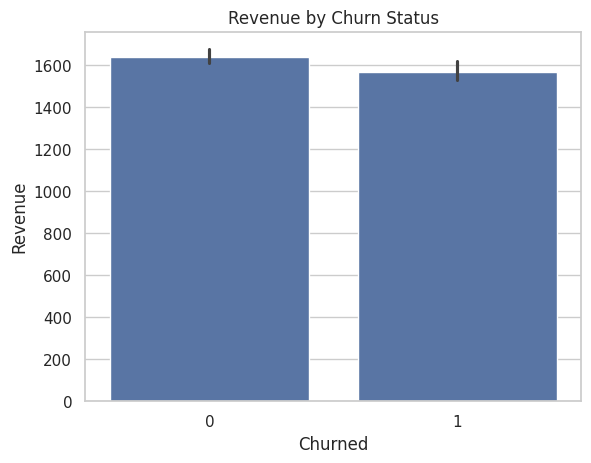

In [20]:
#Visualizing Revenue by Churn Status
sns.barplot(x='Churned', y='Revenue', data=df)
plt.title("Revenue by Churn Status")
plt.show()

#Categorical Analysis

In [21]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Country,
USA,2.786823e+07
UK,1.252683e+07
Canada,9.730906e+06
Germany,7.908382e+06
France,6.762240e+06
Australia,6.372296e+06
India,5.626171e+06
Japan,4.121677e+06


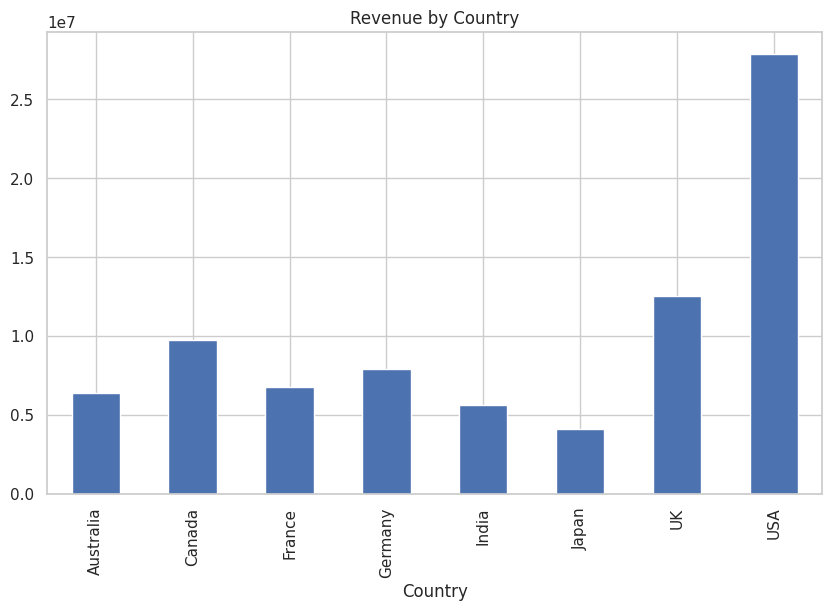

In [22]:
#Visual
plt.figure(figsize=(10,6))
df.groupby('Country')['Revenue'].sum().plot(kind='bar')
plt.title("Revenue by Country")
plt.show()

#Correlation Analysis

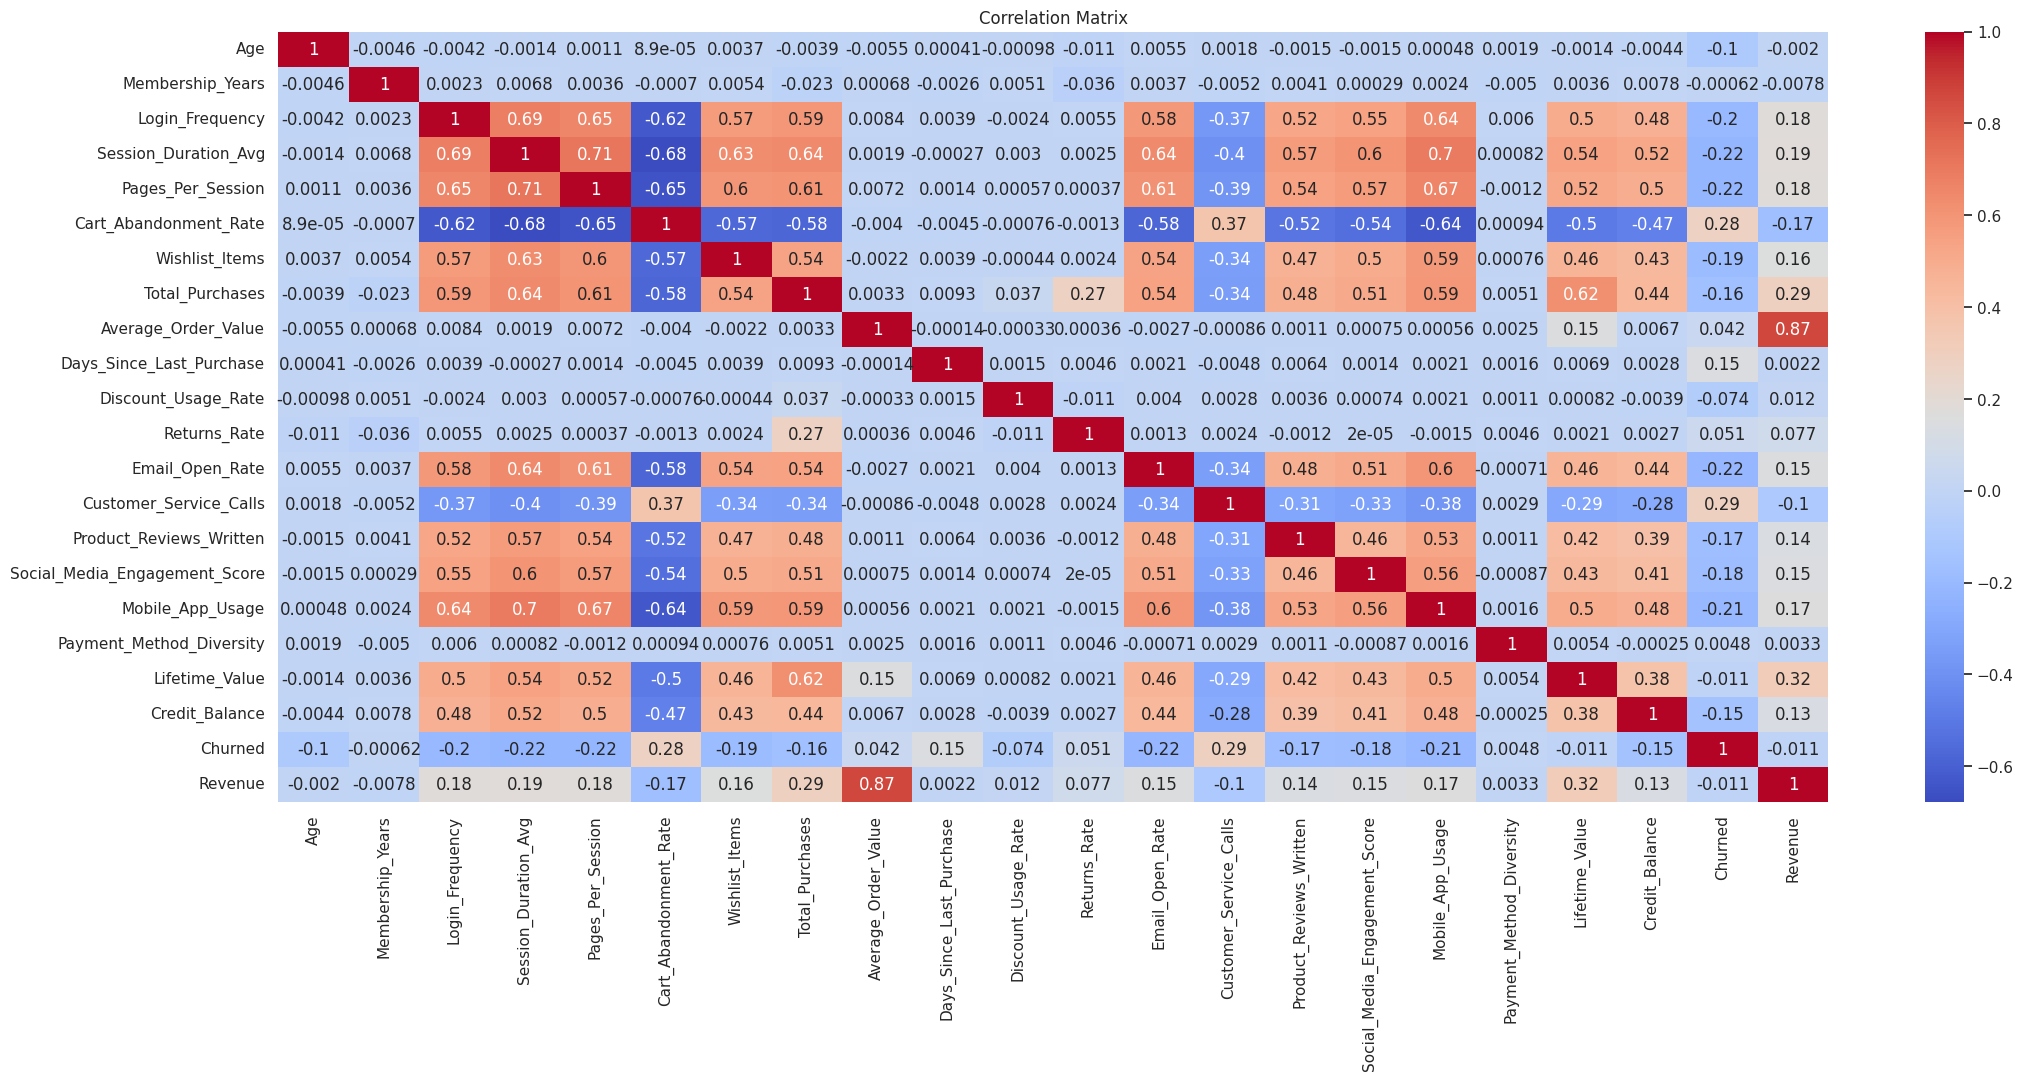

In [23]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#KPI Calculation


In [24]:
#Total Customer
total_customers = df.shape[0]
print("Total Customers:", total_customers)

Total Customers: 50000


In [25]:
#Total Purchases
total_purchases = df['Total_Purchases'].sum()
print("Total Purchases:", total_purchases)

Total Purchases: 655578.8


In [26]:
#Purchase Rate
customers_with_purchase = (df['Total_Purchases'] > 0).sum()
purchase_rate = customers_with_purchase / total_customers

print("Purchase Rate:", round(purchase_rate * 100, 2), "%")

Purchase Rate: 99.9 %


In [27]:
#Total Revenue
total_revenue = df['Revenue'].sum()
print("Total Estimated Revenue:", round(total_revenue, 2))

Total Estimated Revenue: 80916733.09


In [28]:
#Average Order Value
average_order_value = df['Average_Order_Value'].mean()
print("Average Order Value (AOV):", round(average_order_value, 2))

Average Order Value (AOV): 123.12


In [29]:
#Customer Lifetime Value
avg_clv = df['Lifetime_Value'].mean()
print("Average Customer Lifetime Value:", round(avg_clv, 2))

Average Customer Lifetime Value: 1440.63


In [30]:
#Average Cart Abandonment Rate
avg_cart_abandonment = df['Cart_Abandonment_Rate'].mean()
print("Average Cart Abandonment Rate:", round(avg_cart_abandonment * 100, 2), "%")

Average Cart Abandonment Rate: 5708.0 %


In [31]:
#High Abandonment Customer
high_abandonment = (df['Cart_Abandonment_Rate'] > 0.5).sum()
high_abandonment_rate = high_abandonment / total_customers

print("High Cart Abandonment Customers:", round(high_abandonment_rate * 100, 2), "%")

High Cart Abandonment Customers: 99.96 %


In [32]:
#Churn Rate
churn_rate = df['Churned'].mean()
print("Churn Rate:", round(churn_rate * 100, 2), "%")

Churn Rate: 28.9 %


In [33]:
#Revenue Loss from Churned Customer
revenue_lost = df[df['Churned'] == 1]['Revenue'].sum()
print("Revenue Lost from Churned Customers:", round(revenue_lost, 2))

Revenue Lost from Churned Customers: 22649841.29


In [34]:
#Purchase Frequency by Customer
purchase_frequency = df['Total_Purchases'].mean()
print("Average Purchase Frequency:", round(purchase_frequency, 2))

Average Purchase Frequency: 13.11


In [35]:
#Customer Segmentation
df['customer_segment'] = pd.qcut(
    df['Revenue'],
    q=3,
    labels=['Low Value', 'Mid Value', 'High Value']
)

# Segment distribution
segment_counts = df['customer_segment'].value_counts()
print(segment_counts)

customer_segment
Low Value     16668
High Value    16667
Mid Value     16665
Name: count, dtype: int64


In [36]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Revenue,Engagement_Level,customer_segment
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,16.3,20.8,1.0,953.33,2278.0,0,Q1,852.480,High Engagement,Low Value
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,27.6,23.3,3.0,1067.47,3028.0,0,Q4,1607.775,High Engagement,Mid Value
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,27.6,8.8,2.0,1289.75,2317.0,0,Q4,1506.232,Low Engagement,Mid Value
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,85.9,31.0,3.0,2340.92,2674.0,0,Q1,2209.950,Low Engagement,High Value
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,...,83.0,50.4,4.0,3041.29,5354.0,0,Q4,4592.250,High Engagement,High Value


#Export Dataset

In [37]:
df.to_csv("kpi_ready_ecommerce_data.csv", index=False)